# Analyzing Real Estate Data in St. Petersburg

This project was made in the scope of our Business Analytics and Big Data class at the Graduate School of Management (SPBU). Our class was led by a former head of product at Yandex.

The data is from Yandex.Realty classified https://realty.yandex.ru and contains real estate listings for apartments in St. Petersburg from 2016 till the middle of August 2018. 

The aim of this project was to understand the current state of play of the real estate market in the St. Petersburg and define the best listings for future investments.

In this project, I have successfully accomplished the following tasks:

✅ Data engineering: analysing, preparing and cleaning the data (potential outliers)

✅ Data analysis: perform exploratory descriptive analysis

✅ Data analysis: based on statistical methods, define the best listings for investment (payback period)


## Steps to accomplish 
1) Calculate median and mean sell and rent prices in St. Petersburg
2) Find outliers: too cheap or too expensive apartments which seem to be wrong
3) Find houses with the cheapest and most expensive prices per square meter
4) Analyze how many listing have a commission and what is the most ocurring commission

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [2]:
# We can use linux command "head" which shows the first row in the file
!head -n 3 ../Celine/spb.real.estate.archive.2018.tsv

offer_id	first_day_exposition	last_day_exposition	last_price	floor	open_plan	rooms	studio	area	kitchen_area	living_area	agent_fee	renovation	offer_type	category_type	unified_address	building_id
5490504238877583424	2014-11-27T00:00:00+03:00	2016-03-14T00:00:00+03:00	3676740.0	19	False	1	False	27.4	16.56	16.56		0.0	1	2	Россия, Санкт-Петербург, улица Шкапина, 9-11	3552413344225333068
5490504238903444021	2014-11-27T00:00:00+03:00	2016-04-28T00:00:00+03:00	7038880.0	2	False	3	False	85.84	19.64	41.2		0.0	1	2	Россия, Санкт-Петербург, Кушелевская дорога, 3к4	7274736308217971906


In [7]:
# we see that it's tab separated file, we can load it with pd.read_table method
# load our dataset and see which data it contains
spb_df = pd.read_table(r'./data/spb.real.estate.archive.sample5000.tsv')
# checking documentation with "?" to check for this type of format .tsv
pd.read_table?

Signature:
pd.read_table(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates: 'bool | Sequence[Hashable]' = False,
    infer_datetime_format: 'bool | lib.NoDefault' = <no_default>,
    keep_date_col: 'bool' = Fal

In [8]:
# understanding the data
len(spb_df)
spb_df.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
2576,3123800319565825,2017-12-02T00:00:00+03:00,2018-01-23T00:00:00+03:00,5697000.0,21,False,1,False,38.00,10.0,17.0,NaN,NaN,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 5к4",7274736308217969984
4719,8462871159055237446,2017-11-01T00:00:00+03:00,2018-06-12T00:00:00+03:00,21000.0,5,False,1,False,35.00,9.0,18.0,90.0,11.0,2,2,"Россия, Санкт-Петербург, проспект Энгельса, 130к1",6711366030409548209
3199,2981132296818123777,2018-06-01T00:00:00+03:00,2018-07-01T00:00:00+03:00,26000.0,5,False,1,False,31.00,NaN,NaN,NaN,NaN,2,2,"Россия, Санкт-Петербург, Новоизмайловский проспект, 49к1",9160799354282124050
2710,5598182472625990630,2016-02-17T00:00:00+03:00,2016-05-04T00:00:00+03:00,20000.0,8,False,2,False,52.00,10.0,38.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, улица Маршала Захарова, 22к1",6700167350879691304
3000,450146229731440385,2018-02-16T00:00:00+03:00,2018-06-06T00:00:00+03:00,2750000.0,6,False,0,True,25.00,NaN,NaN,NaN,NaN,1,2,"Россия, Санкт-Петербург, улица Крыленко, 1А",359559709405720251
3895,7645371396868347392,2016-06-23T00:00:00+03:00,2018-04-08T00:00:00+03:00,5150000.0,1,False,4,False,78.00,6.2,61.0,NaN,NaN,1,2,"Россия, Санкт-Петербург, улица Ушинского, 39к3",4300236172239973229
2803,6281208089574299392,2017-08-07T00:00:00+03:00,2017-12-09T00:00:00+03:00,3398000.0,1,False,2,False,40.03,5.3,29.0,NaN,2.0,1,2,"Россия, Санкт-Петербург, Пушкин, улица Генерала Хазова, 47",5095998402263564493
3089,1896730477284374982,2017-01-02T00:00:00+03:00,2017-05-28T00:00:00+03:00,37000.0,3,False,2,False,57.00,12.0,31.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Варшавская улица, 23к1",6532707473578054586
62,8310251211199416623,2018-03-14T00:00:00+03:00,2018-08-20T00:00:00+03:00,22900000.0,5,False,5,False,173.20,7.6,134.0,0.0,2.0,1,2,"Россия, Санкт-Петербург, Аптекарский переулок, 4",3756270137055046483
128,3464020066937927234,2015-09-15T00:00:00+03:00,2017-06-29T00:00:00+03:00,7183490.0,11,False,3,False,89.10,16.9,47.1,NaN,5.0,1,2,"Россия, Санкт-Петербург, Русановская улица, 19к2Б",555990634595234380


In [9]:
len(spb_df[(spb_df["offer_type"] == 1)])

3008

# Price analysis
We see that we have both RENT and SELL data. 
<p>offer_type column contains data to distinguish them: 2 stands for RENT, 1 for SELL

## Rent price

In [10]:
# split dataframe to rent and sell
rent_df = spb_df[spb_df.offer_type == 2]
sell_df = spb_df[spb_df.offer_type == 1]
print("Total rent data size: {}".format(len(rent_df)))
print("Total sell data size: {}".format(len(sell_df)))

Total rent data size: 1992
Total sell data size: 3008


In [11]:
# check median and mean price for renting apartments
rent_median_price = rent_df.last_price.median()
rent_mean_price = rent_df.last_price.mean()
print("Rent median price: {}".format(rent_median_price))
print("Rent mean price: {}".format(rent_mean_price))

Rent median price: 24000.0
Rent mean price: 32859.49799196787


In [12]:
# max value
max_price_rent = rent_df.last_price.max()
max_price_rent = rent_df.last_price.max()
print("Max price in rent: {}".format(max_price_rent))
rent_df_max = rent_df[rent_df.last_price == max_price_rent]
rent_df_max

Max price in rent: 3500000.0


,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
533,8492010403417061889,2018-04-06T00:00:00+03:00,2018-04-24T00:00:00+03:00,3500000.0,8,False,0,True,30.0,NaN,NaN,NaN,NaN,2,2,"Россия, Санкт-Петербург, Репищева улица, 10к1",1967793054474181316


We can see that it was probably a mistake. It's hard to imagine why an aparment could cost as much per month. To analyze it let's look at the random sample of rent offers with prices of more than 1 mln rubles.

In [13]:
# Knowing real estate market in St.Petersburg we understand that offers over 1 million rubles are outliers
outliers_rent = rent_df[rent_df.last_price > 1000000]
print("Number of outliers in rent: {}".format(len(outliers_rent)))

Number of outliers in rent: 1


In [14]:
rent_df.last_price.describe()

count    1.992000e+03
mean     3.285950e+04
std      8.097374e+04
min      7.000000e+03
25%      2.000000e+04
50%      2.400000e+04
75%      3.500000e+04
max      3.500000e+06
Name: last_price, dtype: float64

## Data manipulation 

Price per sqm, median prices for house types and find outliers

In [16]:
# Create a new column price_per_sq_m and calculate price per sq m
rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area

C:\Users\celin\AppData\Local\Temp\ipykernel_1220\816257644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area


In [17]:
rent_df.head(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m
5,1494473242958057728,2018-07-05T00:00:00+03:00,2018-07-09T00:00:00+03:00,30000.0,4,False,2,False,56.0,10.0,31.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Большевиков, 2",5885726753943541169,535.714286
6,3375339906972030293,2017-02-26T00:00:00+03:00,2017-02-27T00:00:00+03:00,27000.0,1,False,2,False,46.0,6.0,26.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, набережная Чёрной речки, 61",1197810274181005697,586.956522
7,4219103497489253377,2018-06-04T00:00:00+03:00,2018-06-21T00:00:00+03:00,25000.0,4,False,2,False,62.0,6.0,30.0,NaN,7.0,2,2,"Россия, Санкт-Петербург, Сиреневый бульвар, 8к1",6389457006261529712,403.225806
9,3214369412441853952,2018-01-21T00:00:00+03:00,2018-02-20T00:00:00+03:00,45000.0,7,False,3,False,100.0,NaN,NaN,70.0,NaN,2,2,"Россия, Санкт-Петербург, Бассейная улица, 89",1947435343262898424,450.000000
10,5175901685916328429,2015-10-19T00:00:00+03:00,2018-07-30T00:00:00+03:00,28000.0,14,False,1,False,45.0,11.0,19.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, Туристская улица, 30к2",1747634664072626165,622.222222


In [20]:
# median and mean price per square meter in rent
median_price_per_sq_m = rent_df.price_per_sq_m.median()
mean_price_per_sq_m = rent_df.price_per_sq_m.mean()
print("Median price per sq m in rent: {}".format(median_price_per_sq_m))
print("Mean price per sq m in rent: {}".format(mean_price_per_sq_m))
house_rent_df = rent_df.groupby('unified_address').price_per_sq_m.median().reset_index()
# Rename the column with a 'rename' function in this new dataframe
house_rent_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

Median price per sq m in rent: 545.4545454545455
Mean price per sq m in rent: 647.1032367396033


In [21]:
# merge both df
rent_df = rent_df.merge(house_rent_df)

<Axes: >

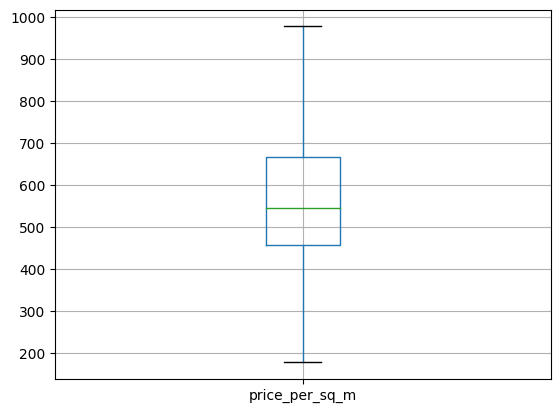

In [22]:
rent_df.boxplot(column="price_per_sq_m",showfliers = False)

In [26]:
rent_df_cleaned = rent_df[~((rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5)]
# look at offers with price > 1 000 000
rent_df_cleaned[(rent_df_cleaned.last_price >= 1000000)]
# clean outliers
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
264,8492010403417061889,2018-04-06T00:00:00+03:00,2018-04-24T00:00:00+03:00,3500000.0,8,False,0,True,30.0,NaN,NaN,NaN,NaN,2,2,"Россия, Санкт-Петербург, Репищева улица, 10к1",1967793054474181316,116666.666667,116666.666667


In [27]:
# Examine prices per sqm on the higher range
rent_df_cleaned[rent_df_cleaned.price_per_sq_m > 3000]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
264,8492010403417061889,2018-04-06T00:00:00+03:00,2018-04-24T00:00:00+03:00,3500000.0,8,False,0,True,30.0,NaN,NaN,NaN,NaN,2,2,"Россия, Санкт-Петербург, Репищева улица, 10к1",1967793054474181316,116666.666667,116666.666667
1706,159653575951184384,2016-06-16T00:00:00+03:00,2016-07-01T00:00:00+03:00,300000.0,2,False,3,False,54.0,8.0,35.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, 18-я линия В.О., 43",6003296125598219505,5555.555556,5555.555556


In [28]:
# outliers are those which are in houses with price per sq m below 1000 rubles, 
# and those which are the same with median, in which case it's the only offer per house
outliers_count = len(rent_df_cleaned[(rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m))])
print("outliers found: {}".format(outliers_count))
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))]

outliers found: 2


In [29]:
# recalculate max price
max_rent_apartment = rent_df_cleaned[rent_df_cleaned.last_price == rent_df_cleaned.last_price.max()]
max_rent_apartment
max_rent_apartment.unified_address.iloc[0]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
172,4991991,2015-12-30T00:00:00+03:00,2016-03-17T00:00:00+03:00,300000.0,4,False,3,False,130.0,12.0,91.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Константиновский проспект, 23А",8174561515904393449,2307.692308,2307.692308


In [32]:
# impoort urllib to prepare correct URLs for looking at offers archive 
# at https://realty.yandex.ru/archive
import urllib

In [33]:
# if you're interested in images of this apartment you can find it here: 
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Парадная%20улица%2C%203к1/snyat/kvartira/2/?roomsTotal=4

# let's print the URL of the page, on which we can find our offer
# we use urllib.parse.quote function to get URL part from our address, otherwise URL wouldn't be correct
# print("https://realty.yandex.ru/archive/{}/snyat/kvartira/2/?roomsTotal=4".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
# print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/?roomsTotal=4".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
# use filters there to select only apartments with 4 rooms

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9A%D0%BE%D0%BD%D1%81%D1%82%D0%B0%D0%BD%D1%82%D0%B8%D0%BD%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9%20%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%2C%2023%D0%90/snyat/kvartira/


## House listings analysis

In [34]:
# Create a new dataframe with houses and median price per sq m
# This time it should with the data calculated without outliers
house_rent_df_cleaned = rent_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)

In [35]:
#here we extract the unified address and the highest median price per sqm
most_expensive_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.max()]
most_expensive_house

,unified_address,house_price_sqm_median_cleaned
484,"Россия, Санкт-Петербург, Константиновский проспект, 23А",2307.692308


In [36]:
cheapest_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.min()]
cheapest_house

,unified_address,house_price_sqm_median_cleaned
135,"Россия, Ленинградская область, Сланцевское городское поселение, Сланцы, улица Ломоносова, 19",177.777778


In [37]:
# consider data only in St. Petersburg
house_rent_df_cleaned_spb = house_rent_df_cleaned[house_rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]
rent_df_cleaned_spb = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = rent_df_cleaned_spb.price_per_sq_m.median()
print("Median price per sq m in St. Petersburg in rent: {}".format(median_price_per_sq_m_in_spb))

Median price per sq m in St. Petersburg in rent: 549.5098039215686


In [39]:
# cheap apartments which are more than two times cheaper than the median
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 250].sample(10)
# it seems that we should clean all apartments where median price is at least 2x higher and cheap 
outliers = rent_df_cleaned_spb[(rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2)]

In [40]:
print("number of cheap outliers 2x cheaper: {}".format(len(outliers)))

number of cheap outliers 2x cheaper: 0


In [43]:
# look at the cheapest apartment
cheapest_offer = rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.price_per_sq_m.min()]
cheapest_offer

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
775,23364706503922945,2018-03-28T00:00:00+03:00,2018-04-27T00:00:00+03:00,18000.0,4,False,3,False,80.0,NaN,NaN,NaN,NaN,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 25к2",9059817452517930631,225.0,243.75


In [44]:
# recalculate median on clean data
house_rent_df_cleaned_spb = rent_df_cleaned_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned_spb.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)
cheapest_house = house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]
cheapest_house

,unified_address,house_price_sqm_median_cleaned
414,"Россия, Санкт-Петербург, Ленинский проспект, 76к1",230.0


# Appartment listings analysis

In [46]:
##Calculate median and mean prices for apartments
rent_df_spb = rent_df[rent_df.unified_address.str.contains("Россия, Санкт-Петербург")]
median_rent_df_spb = rent_df_spb.last_price.median()
print("Median price for rent in Spb before cleaning: {}".format(median_rent_df_spb))
median_rent_df_cleaned_spb = rent_df_cleaned_spb.last_price.median()
print("Median price for rent in Spb after cleaning: {}".format(median_rent_df_cleaned_spb))
mean_rent_df_spb = rent_df_spb.last_price.mean()
print("Mean price for rent in Spb before cleaning: {}".format(mean_rent_df_spb))
mean_rent_df_cleaned_spb = rent_df_cleaned_spb.last_price.mean()
print("Mean price for rent in Spb after cleaning: {}".format(mean_rent_df_cleaned_spb))
print("Variance in median: {}".format(median_rent_df_spb-median_rent_df_cleaned_spb))
print("Variance in mean: {}".format(mean_rent_df_spb-mean_rent_df_cleaned_spb))

Median price for rent in Spb before cleaning: 25000.0
Median price for rent in Spb after cleaning: 25000.0
Mean price for rent in Spb before cleaning: 34117.42903930131
Mean price for rent in Spb after cleaning: 32078.213114754097
Variance in median: 0.0
Variance in mean: 2039.2159245472103


The mean changed the most out of the two measures - it's also higher than the median, the distribution of prices is  skewed in the positive direction. The mean decreased more than the median means that the observations we deleted contained extreme values; as usual, extreme values influence the mean more than the median, the amount of rows deleted influenced the median less, especially if values in the centre of the distribution were not deleted. The central portion of our distribution hasn't changed.

In [47]:
# Calculate median and mean prices for apartments for sell before cleaning the data in St.Petersburg without Leningrad Oblast.
sell_median_price = sell_df[sell_df.unified_address.str.contains("Россия, Санкт-Петербург")].last_price.median()
sell_mean_price = sell_df[sell_df.unified_address.str.contains("Россия, Санкт-Петербург")].last_price.mean()
print("Sell median price: {}".format(sell_median_price))
print("Sell mean price: {}".format(sell_mean_price))
max_price_sell = sell_df.last_price.max()
print("Max sell price: {}".format(max_price_sell))

Sell median price: 5300000.0
Sell mean price: 8242504.012216405
Max sell price: 225000000.0


In [48]:
# Find houses (not apartments!) with the  cheapest and most expensive sell price per sq m in St. Petersburg 
sell_df.last_price.describe()

count    3.008000e+03
mean     7.017690e+06
std      1.123849e+07
min      5.400000e+05
25%      3.250000e+06
50%      4.575000e+06
75%      7.000000e+06
max      2.250000e+08
Name: last_price, dtype: float64

Standard deviation is way too high and different from the mean; the mean is way higher than the median. Probably too many extreme values on the right part of the distribution

In [49]:
sell_df_max = sell_df[sell_df.last_price == max_price_sell]
sell_df_max

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
4876,2554639205087741345,2017-02-27T00:00:00+03:00,2017-10-10T00:00:00+03:00,225000000.0,4,False,6,False,380.0,20.0,180.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Константиновский проспект, 26",5091810811209082908


In [50]:
sell_df.boxplot("last_price")
outliers_sell = sell_df[sell_df.last_price > 360000000]
print("Number of outliers in sell: {}".format(len(outliers_sell)))

Number of outliers in sell: 0


In [53]:
#Calculate price per sqm
sell_df.loc[:,'price_per_sq_m'] = sell_df.last_price/sell_df.area
sell_df.head(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m
0,2848892083364892160,2017-06-20T00:00:00+03:00,2017-08-04T00:00:00+03:00,3500000.0,2,False,2,False,45.0,7.0,29.0,NaN,11.0,1,2,"Россия, Санкт-Петербург, 2-й Рабфаковский переулок, 13",1157084434867682056,77777.777778
1,6300461494540657991,2017-08-03T00:00:00+03:00,2018-08-08T00:00:00+03:00,2000000.0,1,False,3,False,41.4,5.0,32.0,NaN,4.0,1,2,"Россия, Ленинградская область, Гатчина, улица Чкалова, 54А",1833539301435671565,48309.178744
2,1452223300147151873,2015-11-21T00:00:00+03:00,2018-08-04T00:00:00+03:00,6100000.0,7,False,1,False,46.4,12.5,18.4,NaN,3.0,1,2,"Россия, Санкт-Петербург, Кременчугская улица, 13к1",9078299753075955873,131465.517241
3,5413859,2016-02-17T00:00:00+03:00,2016-02-26T00:00:00+03:00,3150000.0,4,False,1,False,38.9,10.1,19.9,NaN,2.0,1,2,"Россия, Санкт-Петербург, Ленинский проспект, 92к3",1861668167106649622,80976.863753
4,4825916940437808128,2018-05-25T00:00:00+03:00,2018-08-20T00:00:00+03:00,6450000.0,8,False,3,False,96.0,13.0,60.0,NaN,1.0,1,2,"Россия, Ленинградская область, Всеволожский район, Бугровское сельское поселение, посёлок Бугры, Полевая улица, 18",6024765089294830322,67187.500000


In [54]:
sell_median_price_per_sq_m = sell_df.price_per_sq_m.median()
sell_mean_price_per_sq_m = sell_df.price_per_sq_m.mean()
print("Median price per sq m in sell: {}".format(sell_median_price_per_sq_m))
print("Mean price per sq m in sell: {}".format(sell_mean_price_per_sq_m))

Median price per sq m in sell: 94782.9231618417
Mean price per sq m in sell: 102714.65350122239


In [55]:
# see if we have many listings on the same unified address (in a "house")
house_sell_df = sell_df.groupby('unified_address').price_per_sq_m.median().reset_index()
house_sell_df.head(5)

,unified_address,price_per_sq_m
0,"Россия, Ленинградская область, Волосово, Гатчинское шоссе, 6",32258.064516
1,"Россия, Ленинградская область, Волосово, Красногвардейская улица, 7",38028.169014
2,"Россия, Ленинградская область, Волосово, Ленинградская улица, 11",35616.438356
3,"Россия, Ленинградская область, Волосово, проспект Вингиссара, 99",37692.307692
4,"Россия, Ленинградская область, Волосовский район, Изварское сельское поселение, деревня Извара, 4",22950.819672


In [56]:
house_sell_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)
sell_df = sell_df.merge(house_sell_df)
sell_df.head(3)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
0,2848892083364892160,2017-06-20T00:00:00+03:00,2017-08-04T00:00:00+03:00,3500000.0,2,False,2,False,45.0,7.0,29.0,NaN,11.0,1,2,"Россия, Санкт-Петербург, 2-й Рабфаковский переулок, 13",1157084434867682056,77777.777778,77777.777778
1,6300461494540657991,2017-08-03T00:00:00+03:00,2018-08-08T00:00:00+03:00,2000000.0,1,False,3,False,41.4,5.0,32.0,NaN,4.0,1,2,"Россия, Ленинградская область, Гатчина, улица Чкалова, 54А",1833539301435671565,48309.178744,48309.178744
2,1452223300147151873,2015-11-21T00:00:00+03:00,2018-08-04T00:00:00+03:00,6100000.0,7,False,1,False,46.4,12.5,18.4,NaN,3.0,1,2,"Россия, Санкт-Петербург, Кременчугская улица, 13к1",9078299753075955873,131465.517241,126554.376726


In [57]:
#are there listings with a wide gap between the median price per sq m and the price per sq m?
sell_median_outliers = sell_df[(sell_df.price_per_sq_m/sell_df.house_price_sqm_median) > 5]
print(len(sell_median_outliers))

0


In [62]:
# Take approximately 5 times the median per sq m (94339)
sell_df_cleaned_variance = sell_df_cleaned[sell_df_cleaned.price_per_sq_m > 472000]
print(len(sell_df_cleaned_variance))
sell_df_cleaned_variance["variance"] = sell_df_cleaned.loc[:,"price_per_sq_m"]-sell_df_cleaned.loc[:,"house_price_sqm_median"]
sell_df_cleaned_variance.head()

13


C:\Users\celin\AppData\Local\Temp\ipykernel_1220\3337825706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_df_cleaned_variance["variance"] = sell_df_cleaned.loc[:,"price_per_sq_m"]-sell_df_cleaned.loc[:,"house_price_sqm_median"]


,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median,variance
538,1249520268186548480,2016-09-16T00:00:00+03:00,2016-12-12T00:00:00+03:00,134500000.0,6,False,1,False,219.0,18.0,97.0,NaN,3.0,1,2,"Россия, Санкт-Петербург, Вязовая улица, 10",1661116405592312730,614155.251142,614155.251142,0.000000
618,269458139003095179,2015-11-04T00:00:00+03:00,2017-02-12T00:00:00+03:00,210000000.0,7,False,3,False,251.0,NaN,200.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, Песочная набережная, 12",4476279760502416431,836653.386454,836653.386454,0.000000
664,5028522704318170442,2015-06-11T00:00:00+03:00,2017-01-09T00:00:00+03:00,132614000.0,6,False,4,False,217.4,23.0,103.6,NaN,6.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,610000.000000,589146.341463,20853.658537
665,321088581220765669,2017-01-13T00:00:00+03:00,2017-01-23T00:00:00+03:00,197984992.0,7,False,3,False,295.5,23.0,NaN,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,669999.972927,589146.341463,80853.631464
666,1312747617989515525,2017-08-03T00:00:00+03:00,2018-08-20T00:00:00+03:00,116500000.0,8,False,3,False,205.0,45.0,73.0,NaN,NaN,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,568292.682927,589146.341463,-20853.658537


In [63]:
# previous approach: houses with more than 5 time the median in price per sq m, and less than 2 times the median price  per sq m
# and those with only one offer per house
# I understand that when the "variance" between median and actual price is wide, it's a mistake? 
outliers_count = len(sell_df_cleaned[(sell_df_cleaned.price_per_sq_m > 472000) 
                                     & ((sell_df_cleaned.house_price_sqm_median < 190000) 
                                        | (sell_df_cleaned.house_price_sqm_median == sell_df_cleaned.price_per_sq_m))])
print("outliers found: {}".format(outliers_count))
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m > 472000) 
                                    & ((sell_df_cleaned.house_price_sqm_median < 190000) 
                                        | (sell_df_cleaned.house_price_sqm_median == sell_df_cleaned.price_per_sq_m)))]

outliers found: 9


In [64]:
sell_df_median_price_sqm_cleaned = sell_df_cleaned.price_per_sq_m.median()
sell_df_mean_price_sqm_cleaned = sell_df_cleaned.price_per_sq_m.mean()
print("Median price per sq m in sell: {}".format(sell_df_median_price_sqm_cleaned))
print("Mean price per sq m in sell: {}".format(sell_df_mean_price_sqm_cleaned))

print("Variance in median: {}".format(sell_median_price_per_sq_m-sell_df_median_price_sqm_cleaned))
print("Variance in mean: {}".format(sell_mean_price_per_sq_m-sell_df_mean_price_sqm_cleaned))

Median price per sq m in sell: 94646.27151051625
Mean price per sq m in sell: 101066.39568681933
Variance in median: 136.65165132544644
Variance in mean: 1648.2578144030558


In [65]:
# we see that descriptive statistics are now better
sell_df_cleaned.price_per_sq_m.describe()

count      2999.000000
mean     101066.395687
std       48461.027545
min        6455.399061
25%       77755.254770
50%       94646.271511
75%      114114.583333
max      669999.972927
Name: price_per_sq_m, dtype: float64

In [66]:
max_sale_apartment = sell_df_cleaned[sell_df_cleaned.last_price == sell_df_cleaned.last_price.max()]
max_sale_apartment

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
665,321088581220765669,2017-01-13T00:00:00+03:00,2017-01-23T00:00:00+03:00,197984992.0,7,False,3,False,295.5,23.0,NaN,NaN,0.0,1,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 76к2",8192868485509619740,669999.972927,589146.341463


In [67]:
# Cheapest building (house) sell price per sq m in St. Petersburg
sell_df_cleaned_spb = sell_df_cleaned[sell_df_cleaned.unified_address.str.contains("Россия, Санкт-Петербург,")]
sell_df_cleaned_spb[sell_df_cleaned_spb.house_price_sqm_median==sell_df_cleaned_spb.house_price_sqm_median.min()]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
1716,7569506429740824656,2018-03-12T00:00:00+03:00,2018-04-12T00:00:00+03:00,2750000.0,2,False,2,False,426.0,5.6,28.0,NaN,NaN,1,2,"Россия, Санкт-Петербург, Кронштадт, улица Мануильского, 1",6218741731417288733,6455.399061,6455.399061


# Investments in St. Petersburg

How many years does it take to payback the money spent on buying apartment by renting it? Find houses in St.Petersburg for which it's the most effective to invest in buying if you plan to rent, and houses in which it will be the most ineffective.

Steps:
1) Use two subgroups, one with all rows but containing house_price_rent, the other with only rows containing a value in house_price_sell.
2) merge based on unified address, calculate breakeven years, and drop NaN in breakeven years, which means there is only one value (rent or sell)
3) keep those which can be compared because we have data for rent and sell at the same address

In [69]:
#renaming for the sake of clarity
sell_df_cleaned = sell_df_cleaned_spb
rent_df_cleaned = rent_df_cleaned_spb

#recalculating medians
print("length cleaned sell in SPb: ",len(sell_df_cleaned), len(sell_df_cleaned.columns))
print("length cleaned rent in SPb: ",len(rent_df_cleaned), len(rent_df_cleaned.columns))
group_df_sell_median = sell_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
group_df_sell_median.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)
group_df_rent_median = rent_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
group_df_rent_median.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

sell_df_cleaned = sell_df_cleaned.merge(group_df_sell_median)
rent_df_cleaned = rent_df_cleaned.merge(group_df_rent_median)
print("length cleaned sell in SPb: ",len(sell_df_cleaned), len(sell_df_cleaned.columns))
print("length cleaned rent in SPb: ",len(rent_df_cleaned), len(rent_df_cleaned.columns))

length cleaned sell in SPb:  2283 19
length cleaned rent in SPb:  1830 19
length cleaned sell in SPb:  2283 19
length cleaned rent in SPb:  1830 19


In [77]:
#Separate rent type median and sell type median
sell_df_cleaned.rename(columns = {'house_price_sqm_median': 'house_price_sqm_median_sell'}, inplace = True)
rent_df_cleaned.rename(columns = {'house_price_sqm_median': 'house_price_sqm_median_rent'}, inplace = True)
frames = [sell_df_cleaned,rent_df_cleaned]
result = pd.concat(frames)
print("length concatenated: ",len(result))

merging_rent=result.loc[(result['offer_type'] == 2), ["unified_address",'house_price_sqm_median_rent']]
print("sell only length",len(merging_rent))
                                                 
result_merged = result.merge(merging_rent, how="inner", on="unified_address")
print("after merging", len(result_merged))
result_merged.drop(columns="house_price_sqm_median_rent_x",  inplace=True)

length concatenated:  4113
sell only length 1830
after merging 3639


In [79]:
result_merged["breakeven_years"]=(result_merged.house_price_sqm_median_sell / result_merged.house_price_sqm_median_rent_y) / 12
final = result_merged[~result_merged['breakeven_years'].isnull()]
print("final length?",len(final))
final_ineffective = final.sort_values(by = "breakeven_years", ascending = False)
final_ineffective.head(3)

final length? 885


,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median_sell,house_price_sqm_median_rent_y,breakeven_years
1651,7569531827548025744,2016-02-29T00:00:00+03:00,2018-08-20T00:00:00+03:00,5450000.0,14,False,1,False,39.0,12.0,18.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, проспект Просвещения, 99",6354249340138183015,139743.589744,139743.589744,301.204819,38.662393
744,5028522700595483262,2015-06-18T00:00:00+03:00,2016-04-14T00:00:00+03:00,49300000.0,12,False,3,False,123.0,41.8,51.4,NaN,0.0,1,2,"Россия, Санкт-Петербург, Московский район, улица Победы, 5",6662333406016045796,400813.008130,400813.008130,895.522388,37.297877
1879,4193937,2015-10-10T00:00:00+03:00,2016-02-07T00:00:00+03:00,23000000.0,6,False,4,False,120.0,16.0,65.0,NaN,1.0,1,2,"Россия, Санкт-Петербург, Московский проспект, 186",4373184457909325106,191666.666667,191666.666667,482.758621,33.085317


In [76]:
final_effective = final.sort_values(by = "breakeven_years", ascending = True)
final_effective.head(3)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median_sell,house_price_sqm_median_rent_x,house_price_sqm_median_rent_y,breakeven_years
1312,5660553206702926516,2017-01-29T00:00:00+03:00,2017-02-01T00:00:00+03:00,2073000.0,19,False,0,True,24.88,NaN,18.22,NaN,0.0,1,2,"Россия, Санкт-Петербург, Большая Посадская улица, 12",5346173331250139734,83319.935691,83319.935691,NaN,1018.518519,6.817086
610,5614092655173931813,2016-06-09T00:00:00+03:00,2016-07-29T00:00:00+03:00,7696656.0,9,False,4,False,75.68,21.24,34.96,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Оптиков, 34к1",4182602142298054307,101700.000000,125597.876893,NaN,1304.347826,8.024309
611,9141679493746083274,2016-03-14T00:00:00+03:00,2016-04-20T00:00:00+03:00,6300000.0,7,False,2,False,45.69,NaN,NaN,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Оптиков, 34к1",4182602142298054307,137885.751806,125597.876893,NaN,1304.347826,8.024309


The house located on проспект Просвещения, 99, if bought, for the current rent price, will take 101 years to cover the money for buying it.
The house located on Большая Посадская улица, 12, if bought, for the current rent price, will take 2 years to cover the money for buying it.